# Import required libraries

In [ ]:
import kagglehub
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

# Download the dataset from Kagglehub

In [ ]:
path = kagglehub.dataset_download("imdevskp/corona-virus-report")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/imdevskp/corona-virus-report/versions/166


In [ ]:
# List all files in the directory
files = os.listdir(path)
print("Files in the dataset directory:", files)

Files in the dataset directory: ['country_wise_latest.csv', 'covid_19_clean_complete.csv', 'worldometer_data.csv', 'usa_county_wise.csv', 'full_grouped.csv', 'day_wise.csv']


**Let us explore the files in the directory**

In [ ]:
# Load CSV file into a pandas DataFrame
file_path = os.path.join(path, 'country_wise_latest.csv')
df_country = pd.read_csv(file_path)

In [ ]:
df_country.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [ ]:
file_path = os.path.join(path, 'worldometer_data.csv')
df_world = pd.read_csv(file_path)

In [ ]:
df_world.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


In [ ]:
# Load CSV file into a pandas DataFrame
file_path = os.path.join(path, 'covid_19_clean_complete.csv')
df_covid = pd.read_csv(file_path)

In [ ]:
df_covid.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [ ]:
# Load CSV file into a pandas DataFrame
file_path = os.path.join(path, 'full_grouped.csv')
df_full = pd.read_csv(file_path)

In [ ]:
df_full.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


In [ ]:
# Load CSV file into a pandas DataFrame
file_path = os.path.join(path, 'day_wise.csv')
df_day = pd.read_csv(file_path)

In [ ]:
df_day.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


In [ ]:
# Load CSV file into a pandas DataFrame
file_path = os.path.join(path, 'usa_county_wise.csv')
df_usa = pd.read_csv(file_path)

In [ ]:
df_usa.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed,Deaths
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,"American Samoa, US",1/22/20,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,"Guam, US",1/22/20,0,0
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,"Northern Mariana Islands, US",1/22/20,0,0
3,63072001,PR,PRI,630,72001.0,Adjuntas,Puerto Rico,US,18.180117,-66.754367,"Adjuntas, Puerto Rico, US",1/22/20,0,0
4,63072003,PR,PRI,630,72003.0,Aguada,Puerto Rico,US,18.360255,-67.175131,"Aguada, Puerto Rico, US",1/22/20,0,0


**Data Cleaning**

In [ ]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [ ]:
# Check for missing values
df_country.isnull().sum()

,0
Country/Region,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
New cases,0
New deaths,0
New recovered,0
Deaths / 100 Cases,0
Recovered / 100 Cases,0


In [ ]:
df_world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        209 non-null    int64  
 4   NewCases          4 non-null      float64
 5   TotalDeaths       188 non-null    float64
 6   NewDeaths         3 non-null      float64
 7   TotalRecovered    205 non-null    float64
 8   NewRecovered      3 non-null      float64
 9   ActiveCases       205 non-null    float64
 10  Serious,Critical  122 non-null    float64
 11  Tot Cases/1M pop  208 non-null    float64
 12  Deaths/1M pop     187 non-null    float64
 13  TotalTests        191 non-null    float64
 14  Tests/1M pop      191 non-null    float64
 15  WHO Region        184 non-null    object 
dtypes: float64(12), int64(1), object(3)
memory u

In [ ]:
# Check for missing values
df_world.isnull().sum()

,0
Country/Region,0
Continent,1
Population,1
TotalCases,0
NewCases,205
TotalDeaths,21
NewDeaths,206
TotalRecovered,4
NewRecovered,206
ActiveCases,4


In [ ]:
# Handle missing values in df_world
# Store the numerical columns in num and replace missing values with 0
num = ['Population', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases', 'Serious,Critical',
       'Tot Cases/1M pop', 'Deaths/1M pop', 'TotalTests', 'Tests/1M pop']
df_world[num] = df_world[num].fillna(0)
# Replace non-numeric missing values with 'Missing'
df_world['WHO Region'] = df_world['WHO Region'].fillna('Missing')
df_world['Continent'] = df_world['Continent'].fillna('Missing')

In [ ]:
df_world.isnull().sum()

,0
Country/Region,0
Continent,0
Population,0
TotalCases,0
NewCases,0
TotalDeaths,0
NewDeaths,0
TotalRecovered,0
NewRecovered,0
ActiveCases,0


In [ ]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [ ]:
# Check for missing values
df_covid.isnull().sum()

,0
Province/State,34404
Country/Region,0
Lat,0
Long,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
WHO Region,0


In [ ]:
# Replace missing Province/State values with 'Unknown'
df_covid['Province/State']=df_covid['Province/State'].fillna('Unknown')

In [ ]:
df_covid.isnull().sum()

,0
Province/State,0
Country/Region,0
Lat,0
Long,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
WHO Region,0


In [ ]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            35156 non-null  object
 1   Country/Region  35156 non-null  object
 2   Confirmed       35156 non-null  int64 
 3   Deaths          35156 non-null  int64 
 4   Recovered       35156 non-null  int64 
 5   Active          35156 non-null  int64 
 6   New cases       35156 non-null  int64 
 7   New deaths      35156 non-null  int64 
 8   New recovered   35156 non-null  int64 
 9   WHO Region      35156 non-null  object
dtypes: int64(7), object(3)
memory usage: 2.7+ MB


In [ ]:
# Check for missing values
df_full.isnull().sum()

,0
Date,0
Country/Region,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
New cases,0
New deaths,0
New recovered,0
WHO Region,0


In [ ]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    188 non-null    object 
 1   Confirmed               188 non-null    int64  
 2   Deaths                  188 non-null    int64  
 3   Recovered               188 non-null    int64  
 4   Active                  188 non-null    int64  
 5   New cases               188 non-null    int64  
 6   New deaths              188 non-null    int64  
 7   New recovered           188 non-null    int64  
 8   Deaths / 100 Cases      188 non-null    float64
 9   Recovered / 100 Cases   188 non-null    float64
 10  Deaths / 100 Recovered  188 non-null    float64
 11  No. of countries        188 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 17.8+ KB


In [ ]:
# Check for missing values
df_day.isnull().sum()

,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
New cases,0
New deaths,0
New recovered,0
Deaths / 100 Cases,0
Recovered / 100 Cases,0


In [ ]:
df_usa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627920 entries, 0 to 627919
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   UID             627920 non-null  int64  
 1   iso2            627920 non-null  object 
 2   iso3            627920 non-null  object 
 3   code3           627920 non-null  int64  
 4   FIPS            626040 non-null  float64
 5   Admin2          626792 non-null  object 
 6   Province_State  627920 non-null  object 
 7   Country_Region  627920 non-null  object 
 8   Lat             627920 non-null  float64
 9   Long_           627920 non-null  float64
 10  Combined_Key    627920 non-null  object 
 11  Date            627920 non-null  object 
 12  Confirmed       627920 non-null  int64  
 13  Deaths          627920 non-null  int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 67.1+ MB


In [ ]:
# Check for missing values
df_usa.isnull().sum()

,0
UID,0
iso2,0
iso3,0
code3,0
FIPS,1880
Admin2,1128
Province_State,0
Country_Region,0
Lat,0
Long_,0


In [ ]:
# Handle missing values in df_usa
df_usa['FIPS'] = df_usa['FIPS'].fillna(df_usa['FIPS'].bfill())
df_usa['Admin2'] = df_usa['Admin2'].fillna('Missing')

In [ ]:
df_usa.isnull().sum()

,0
UID,0
iso2,0
iso3,0
code3,0
FIPS,10
Admin2,0
Province_State,0
Country_Region,0
Lat,0
Long_,0


Let us check for duplicates and remove them

In [ ]:
df_country.duplicated().sum()

0

In [ ]:
df_world.duplicated().sum()

0

In [ ]:
df_covid.duplicated().sum()

0

In [ ]:
df_full.duplicated().sum()

0

In [ ]:
df_day.duplicated().sum()

0

In [ ]:
df_usa.duplicated().sum()

0

There is no duplicate value in our dataset

**Let us extract data for Nigeria and try to generate some insight from the dataset**

In [ ]:
nigeria_data = df_covid.loc[df_covid['Country/Region'] == 'Nigeria', ['Date', 'Recovered', 'Deaths', 'Confirmed', 'Active',]]
nigeria_data.head()

,Date,Recovered,Deaths,Confirmed,Active
171,2020-01-22,0,0,0,0
432,2020-01-23,0,0,0,0
693,2020-01-24,0,0,0,0
954,2020-01-25,0,0,0,0
1215,2020-01-26,0,0,0,0


In [ ]:
nigeria_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188 entries, 171 to 48978
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       188 non-null    object
 1   Recovered  188 non-null    int64 
 2   Deaths     188 non-null    int64 
 3   Confirmed  188 non-null    int64 
 4   Active     188 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 12.9+ KB


In [ ]:
nigeria_data.describe()

,Recovered,Deaths,Confirmed,Active
count,188.000000,188.000000,188.000000,188.000000
mean,3196.425532,209.659574,8691.702128,5285.617021
std,4990.987822,273.979216,12251.487624,7036.395437
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.750000,1.750000
50%,215.000000,33.500000,1138.500000,890.000000
75%,4386.750000,383.250000,14043.250000,9273.250000
max,18203.000000,860.000000,41180.000000,22300.000000


**Let us look for some insight from our extracted data for Nigeria**

In [ ]:
# Convert 'Date' column to datetime objects
nigeria_data['Date'] = pd.to_datetime(nigeria_data['Date'])

In [ ]:
# Set 'Date' as the index
nigeria_data = nigeria_data.set_index('Date')

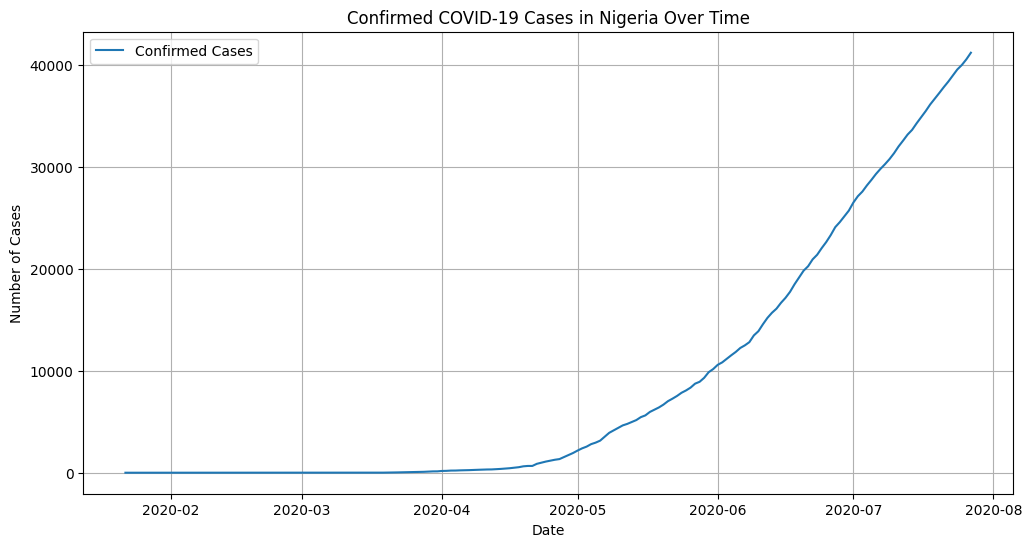

In [ ]:
# Plot Confirmed Cases over time
plt.figure(figsize=(12, 6))
plt.plot(nigeria_data['Confirmed'], label='Confirmed Cases')
plt.title('Confirmed COVID-19 Cases in Nigeria Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.show()

April 2020 was when there was spike in the number of confirmed cases in Nigeria

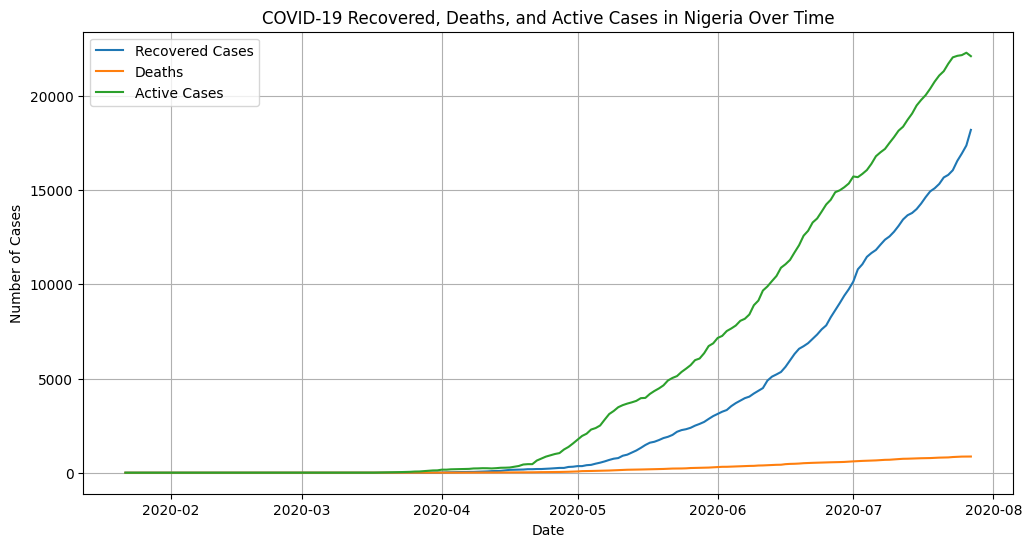

In [ ]:
# Plot Recovered, Deaths, and Active Cases
plt.figure(figsize=(12, 6))
plt.plot(nigeria_data['Recovered'], label='Recovered Cases')
plt.plot(nigeria_data['Deaths'], label='Deaths')
plt.plot(nigeria_data['Active'], label='Active Cases')
plt.title('COVID-19 Recovered, Deaths, and Active Cases in Nigeria Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Calculate 7-day rolling average of confirmed cases
nigeria_data['Confirmed_Rolling_Avg'] = nigeria_data['Confirmed'].rolling(window=7).mean()

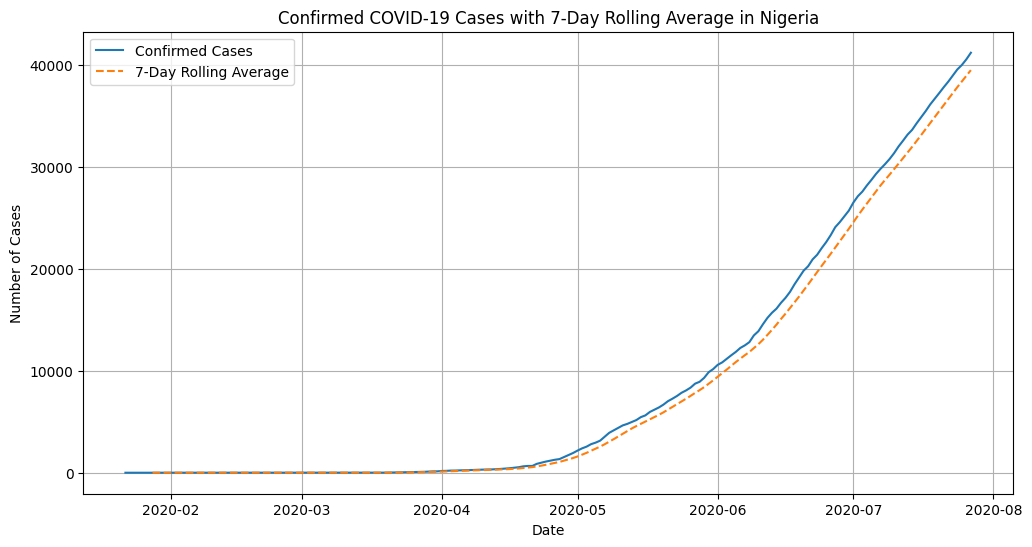

In [ ]:
# Plot the rolling average
plt.figure(figsize=(12, 6))
plt.plot(nigeria_data['Confirmed'], label='Confirmed Cases')
plt.plot(nigeria_data['Confirmed_Rolling_Avg'], label='7-Day Rolling Average', linestyle='--')
plt.title('Confirmed COVID-19 Cases with 7-Day Rolling Average in Nigeria')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.show()

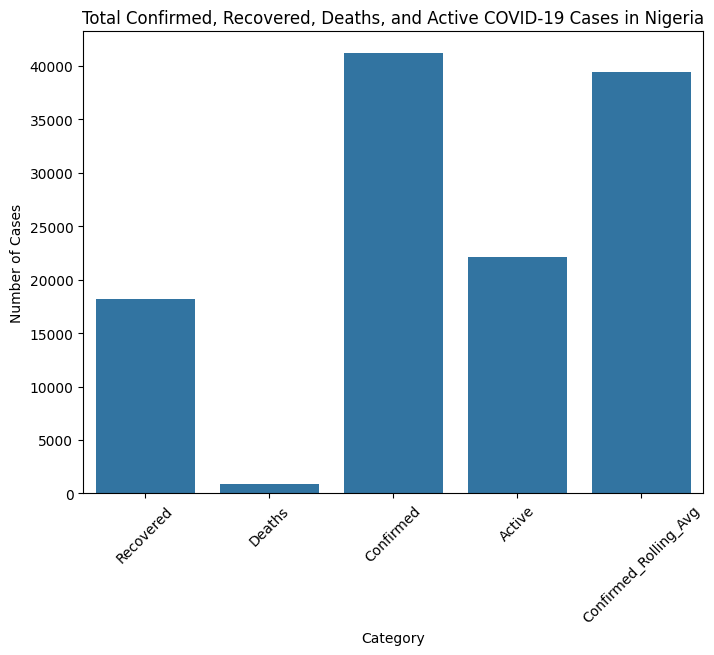

In [ ]:
# Create a bar plot of the total confirmed, recovered, deaths, and active cases
total_cases = nigeria_data.iloc[-1] # Get the latest data
plt.figure(figsize=(8, 6))
sns.barplot(x=total_cases.index, y=total_cases.values)
plt.title("Total Confirmed, Recovered, Deaths, and Active COVID-19 Cases in Nigeria")
plt.xlabel("Category")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45)
plt.show()

More people recovered from Covid 19 than died which barnished the impression that the disease is a death sentence

**Let us create additional features in order to derive more insight**

In [ ]:
# Calculate daily growth rates
nigeria_data['Daily_Growth_Rate'] = nigeria_data['Confirmed'].pct_change()

# Calculate mortality ratio
nigeria_data['Mortality_Ratio'] = nigeria_data['Deaths'] / nigeria_data['Confirmed']

# Retrieve Nigeria's population
nigeria_population = df_world['Population'].loc[df_world['Country/Region'] == 'Nigeria'].values[0]

# Calculate cases per population
nigeria_data['Cases_Per_Million'] = (nigeria_data['Confirmed'] / nigeria_population) * 1000000

# Display the updated DataFrame
nigeria_data.tail()

,Recovered,Deaths,Confirmed,Active,Confirmed_Rolling_Avg,Daily_Growth_Rate,Mortality_Ratio,Cases_Per_Million
Date,,,,,,,,
2020-07-23,16061,833,38948,22054,37220.285714,0.015752,0.021387,188.513129
2020-07-24,16559,845,39539,22135,37803.857143,0.015174,0.021371,191.373642
2020-07-25,16948,856,39977,22173,38356.714286,0.011078,0.021412,193.493616
2020-07-26,17374,858,40532,22300,38909.428571,0.013883,0.021168,196.179884
2020-07-27,18203,860,41180,22117,39474.428571,0.015987,0.020884,199.316284


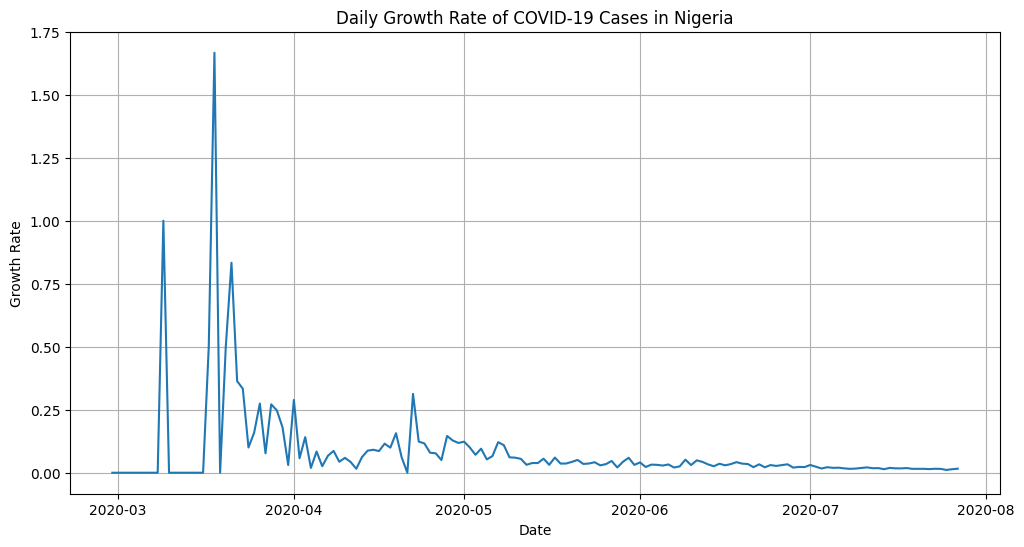

In [ ]:
# Plot Daily Growth Rate
plt.figure(figsize=(12, 6))
plt.plot(nigeria_data['Daily_Growth_Rate'])
plt.title('Daily Growth Rate of COVID-19 Cases in Nigeria')
plt.xlabel('Date')
plt.ylabel('Growth Rate')
plt.grid(True)
plt.show()

The growth rate actually spiked in March 2020. The rate fluctuated in April 2020 and eventually flattened in May. The spike in March was before the lockdown and implementation of social distancing measures. The growth rate flattened when lockdown and social distancing measures were introduced

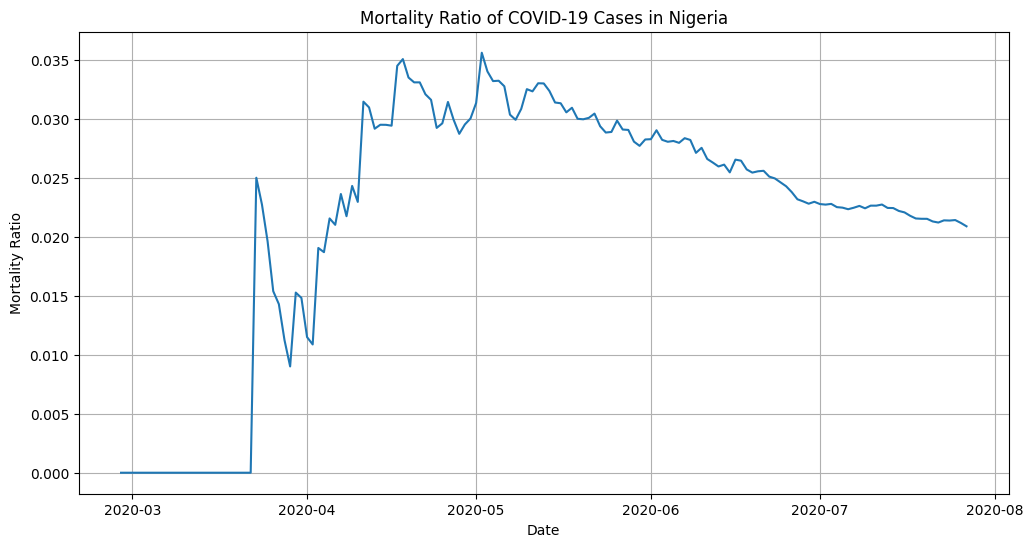

In [ ]:
# Plot Mortality Ratio
plt.figure(figsize=(12, 6))
plt.plot(nigeria_data['Mortality_Ratio'])
plt.title('Mortality Ratio of COVID-19 Cases in Nigeria')
plt.xlabel('Date')
plt.ylabel('Mortality Ratio')
plt.grid(True)
plt.show()

The mortality ratio spiked in March 2020 and reached its peak in May before it started reducing. Healthcare workers were able to stick to treatment procedures that worked and reduce the mortality rate around May, unlike the initial stage of the pandemic when different treatment procedures were being administered based on trial and error.

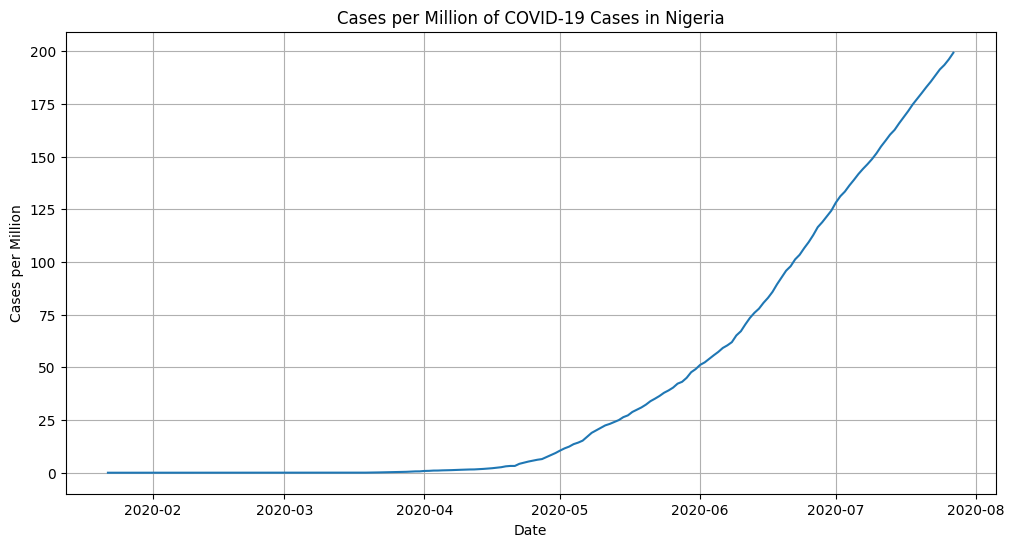

In [ ]:
# Plot Cases per million
plt.figure(figsize=(12, 6))
plt.plot(nigeria_data['Cases_Per_Million'])
plt.title('Cases per Million of COVID-19 Cases in Nigeria')
plt.xlabel('Date')
plt.ylabel('Cases per Million')
plt.grid(True)
plt.show()

Cases per million of the population started increasing in April. This is as a result of more people carrying out Covid 19 tests to confirm that their illness is not just malaria or common cold. More health facilites with the capability to carry out Covid 19 tests were opened around this time.

In [ ]:
#Using plotly for interactive visualization
fig = px.line(nigeria_data, x=nigeria_data.index, y='Confirmed', title='Confirmed Cases in Nigeria over Time (Interactive)')
fig.show()

First confirmed case was on February 28, 2020

In [ ]:
fig = px.line(nigeria_data, x=nigeria_data.index, y=['Recovered', 'Deaths', 'Active'],
              title='Recovered, Deaths, and Active Cases in Nigeria over Time (Interactive)')
fig.show()

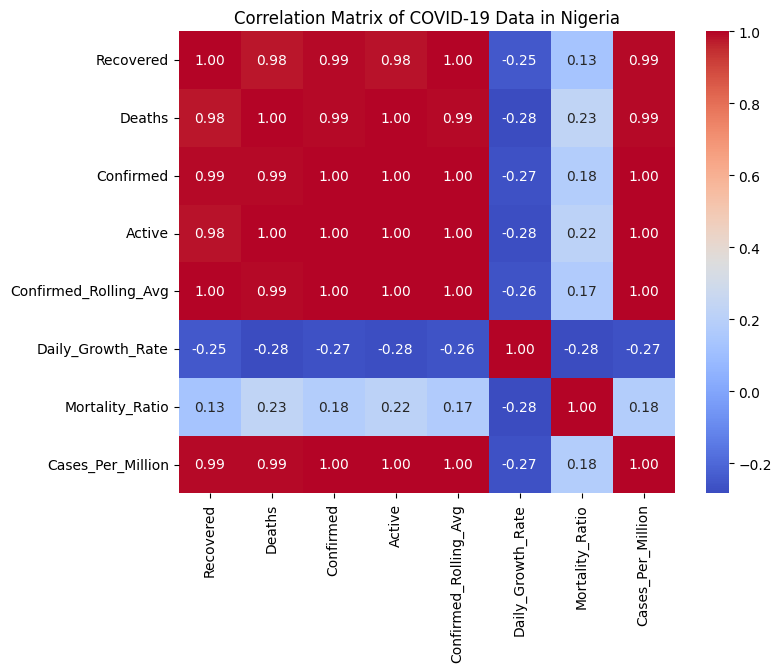

In [ ]:
# Correlation Matrix
correlation_matrix = nigeria_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of COVID-19 Data in Nigeria')
plt.show()

# Let us train our machine learning models

We are going to apply Time series and classification models

In [ ]:
# --- Time Series Forecasting (Confirmed Cases) ---
# Prepare the data for time series analysis
nigeria_data['Days'] = range(len(nigeria_data))
X = nigeria_data[['Days']]
y = nigeria_data['Confirmed']

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
# Train a linear regression model
model_ts = LinearRegression()
model_ts.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions
y_pred = model_ts.predict(X_test)

In [ ]:
# Evaluate the model
rmse = root_mean_squared_error(y_test, y_pred)
print(f"Time Series (Linear Regression) RMSE: {rmse}")

Time Series (Linear Regression) RMSE: 19355.277200660337


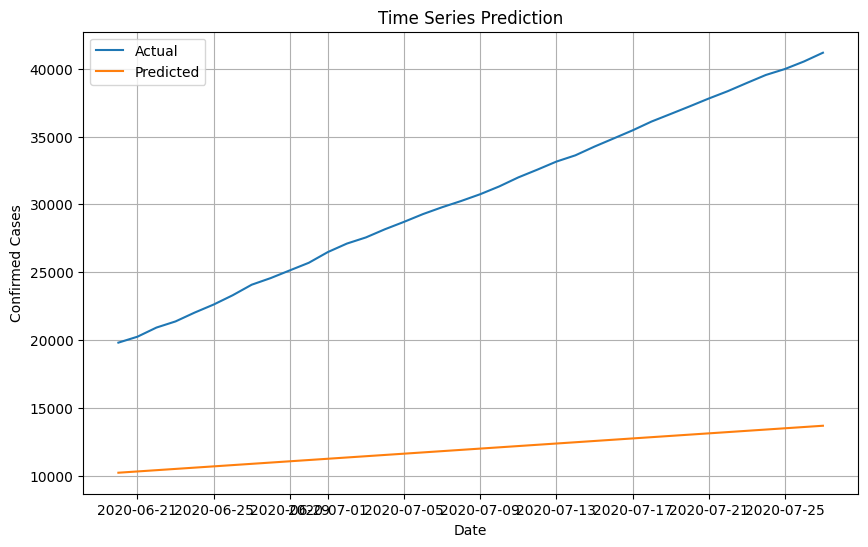

In [ ]:
# Visualization of Time Series (Linear Regression) model predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test.values, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('Time Series Prediction')
plt.legend()
plt.grid(True)
plt.show()

This model did not perform very well as can be seen from the RMSE value of 19355.277200660337 and the graph shown above

In [ ]:
# --- Classification (Binary: High vs Low Active Cases) ---
# Create a binary target variable (e.g., Active cases > 1000)
threshold = 1000  # Example threshold
nigeria_data['High_Active'] = (nigeria_data['Active'] > threshold).astype(int)

In [ ]:
# Prepare data
X_cls = nigeria_data[['Confirmed', 'Recovered', 'Deaths']]
y_cls = nigeria_data['High_Active']

In [ ]:
# Scale features
scaler = MinMaxScaler()
X_cls_scaled = scaler.fit_transform(X_cls)

In [ ]:
# Split data
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls_scaled, y_cls, test_size=0.2, random_state=42)

In [ ]:
# Train a random forest classifier
model_cls = RandomForestClassifier()
model_cls.fit(X_train_cls, y_train_cls)

RandomForestClassifier()

In [ ]:
# Make predictions
y_pred_cls = model_cls.predict(X_test_cls)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test_cls, y_pred_cls)
precision = precision_score(y_test_cls, y_pred_cls)
recall = recall_score(y_test_cls, y_pred_cls)
f1 = f1_score(y_test_cls, y_pred_cls)

In [ ]:
print(f"\nClassification (Random Forest):")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


Classification (Random Forest):
Accuracy: 0.9736842105263158
Precision: 1.0
Recall: 0.9473684210526315
F1-score: 0.972972972972973


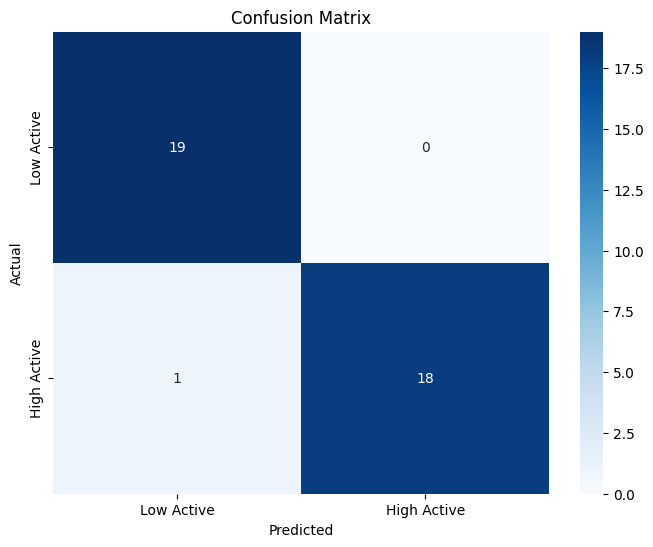

In [ ]:
# Visualization of Classification (Random Forest) model predictions
cm = confusion_matrix(y_test_cls, y_pred_cls)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low Active', 'High Active'],
            yticklabels=['Low Active', 'High Active'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The classification model performed better

In [ ]:
# Prepare the data for ARIMA
train_data = nigeria_data['Confirmed'][:-30]  # Use a portion for training
test_data = nigeria_data['Confirmed'][-30:]   # Use the last 30 for testing

In [ ]:
# Fit the ARIMA model
model = ARIMA(train_data, order=(5, 1, 0))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



In [ ]:
# Make predictions
predictions = model_fit.predict(start=len(train_data), end=len(nigeria_data['Confirmed'])-1)

In [ ]:
# Evaluate the model
rmse = root_mean_squared_error(test_data, predictions)
print(f"ARIMA RMSE: {rmse}")

ARIMA RMSE: 2038.8164738404578


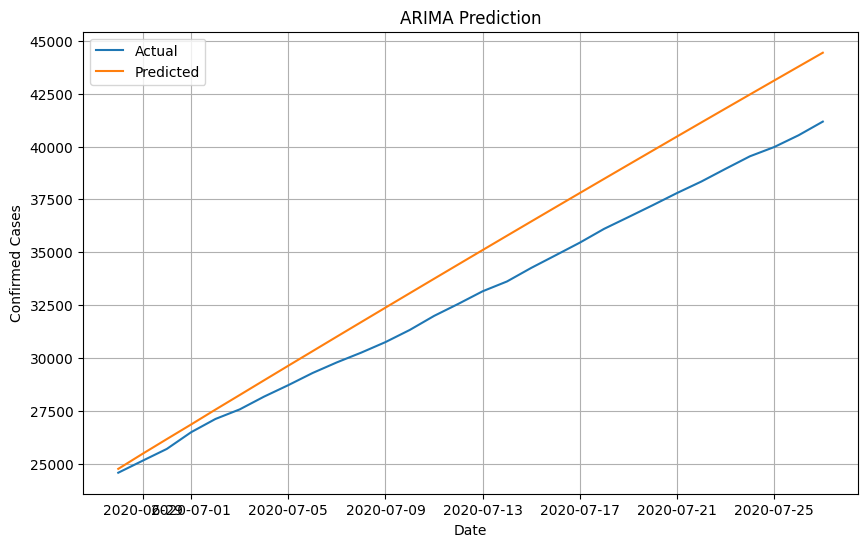

In [ ]:
# Visualization of ARIMA model predictions
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data.values, label='Actual')
plt.plot(test_data.index, predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('ARIMA Prediction')
plt.legend()
plt.grid(True)
plt.show()

The ARIMA time series model performed better than Linear Regression time series model, but it still overestimated the number of cases.

# Let us look at the global data

Let us merge our dataset to be able to extract meaningful insight

In [ ]:
# Let us find common columns between df_covid and df_country dataframes
covid_columns = set(df_covid.columns)
country_columns = set(df_country.columns)
common_columns = covid_columns & country_columns
common_columns

{'Active', 'Confirmed', 'Country/Region', 'Deaths', 'Recovered', 'WHO Region'}

In [ ]:
commons = ['Active', 'Confirmed', 'Country/Region', 'Deaths', 'Recovered', 'WHO Region']
combined_data = pd.merge(df_covid, df_country, on=commons, how='inner')
combined_data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
0,Unknown,Timor-Leste,-8.874217,125.727539,2020-04-24,24,0,0,24,South-East Asia,0,0,0,0.0,0.0,0.0,24,0,0.0
1,Unknown,Timor-Leste,-8.874217,125.727539,2020-04-25,24,0,0,24,South-East Asia,0,0,0,0.0,0.0,0.0,24,0,0.0
2,Unknown,Timor-Leste,-8.874217,125.727539,2020-04-26,24,0,0,24,South-East Asia,0,0,0,0.0,0.0,0.0,24,0,0.0
3,Unknown,Timor-Leste,-8.874217,125.727539,2020-04-27,24,0,0,24,South-East Asia,0,0,0,0.0,0.0,0.0,24,0,0.0
4,Unknown,Timor-Leste,-8.874217,125.727539,2020-04-28,24,0,0,24,South-East Asia,0,0,0,0.0,0.0,0.0,24,0,0.0


In [ ]:
#convert (object to datetime)
# change the format of date
combined_data["Date"] = pd.to_datetime(combined_data["Date"], format = "%Y-%m-%d")
df_covid["Date"] = pd.to_datetime(df_covid["Date"], format = "%Y-%m-%d")

In [ ]:
# Top 10 Countries with the Highest Confirmed Cases
top_10_confirmed = combined_data.nlargest(10, 'Confirmed')
print("Top 10 Countries with Highest Confirmed Cases:\n", top_10_confirmed[['Country/Region', 'Confirmed']])

Top 10 Countries with Highest Confirmed Cases:
     Country/Region  Confirmed
628             US    4290259
499         Brazil    2442375
545          India    1480073
597         Russia     816680
610   South Africa     452529
572         Mexico     395489
591           Peru     389717
508          Chile     347923
547           Iran     293606
587       Pakistan     274289


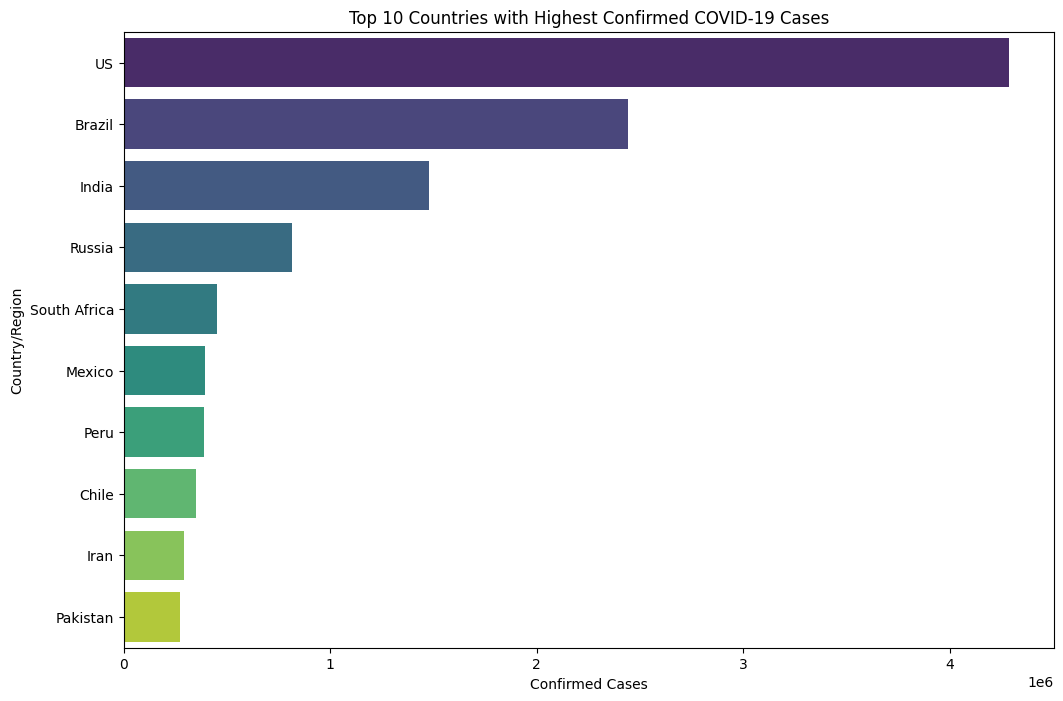

In [ ]:
# Show the plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Confirmed', y='Country/Region', data=top_10_confirmed, legend=False, hue='Country/Region', palette='viridis')
plt.xlabel('Confirmed Cases')
plt.ylabel('Country/Region')
plt.title('Top 10 Countries with Highest Confirmed COVID-19 Cases')
plt.show()

There is need for Nigerian authorities to issue travel advice to citizens in respect of travelling to countries with most confirmed cases of covid 19. Citizens need to exercise restraint and ensure good personal hygiene and practice of social distancing if they found themselves in any of the countries listed.
People coming into Nigeria from these countries need to observe quarantine procedures and self isolate for the prescribed number of days

**Let us look at distribution of deaths from covid 19 across regions**

In [ ]:
region_deaths = df_covid.groupby('WHO Region')['Deaths'].sum().reset_index()

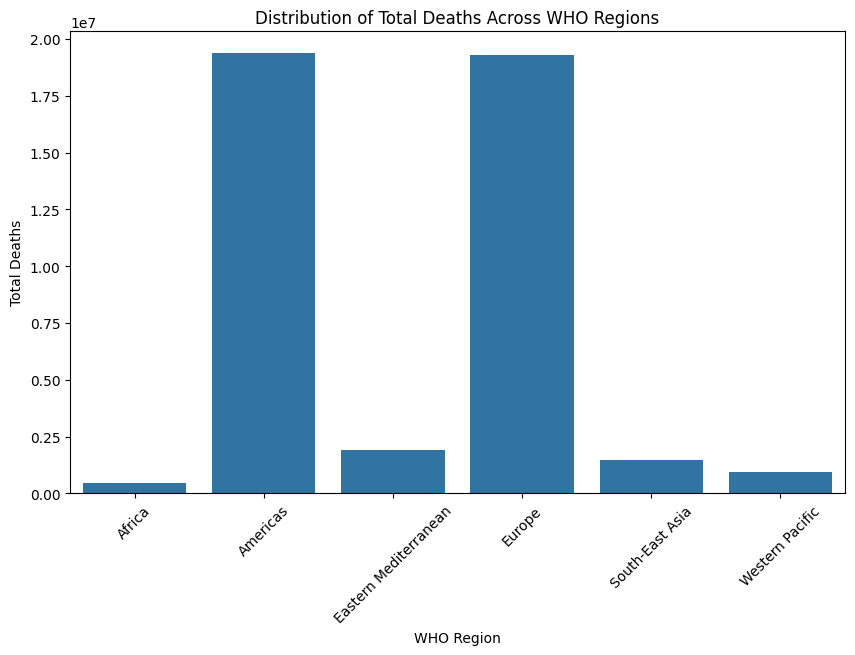

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='WHO Region', y='Deaths', data=region_deaths)
plt.xlabel('WHO Region')
plt.ylabel('Total Deaths')
plt.title('Distribution of Total Deaths Across WHO Regions')
plt.xticks(rotation=45)
plt.show()

The Americas has the highest death rate followed by Europe

**Let us look at total confirmed number of cases**

In [ ]:
t_cases = df_covid.loc[:, ['Date', 'Confirmed']].groupby('Date').sum().reset_index()
t_cases

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


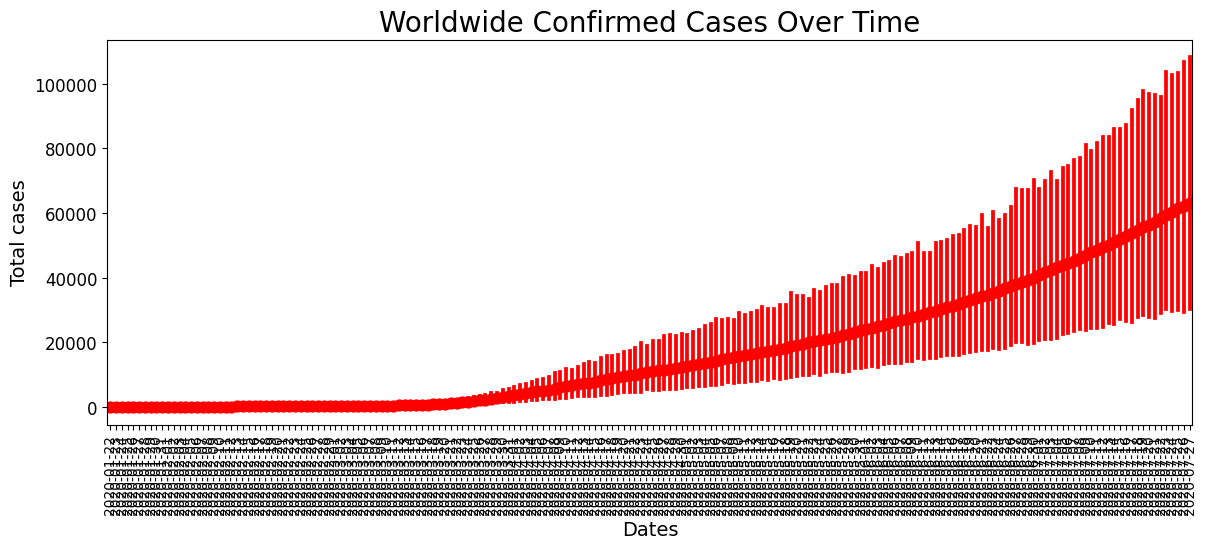

In [ ]:
plt.figure(figsize= (14,5))

ax = sns.pointplot(x=df_covid['Date'],
                   y=df_covid['Confirmed'],
                   color='r')
ax.set(xlabel='Dates', ylabel='Total cases')

plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=12)

plt.xlabel('Dates', fontsize=14)
plt.ylabel('Total cases', fontsize=14)
plt.title('Worldwide Confirmed Cases Over Time', fontsize=20)
plt.show()

Let us compare the number in each status

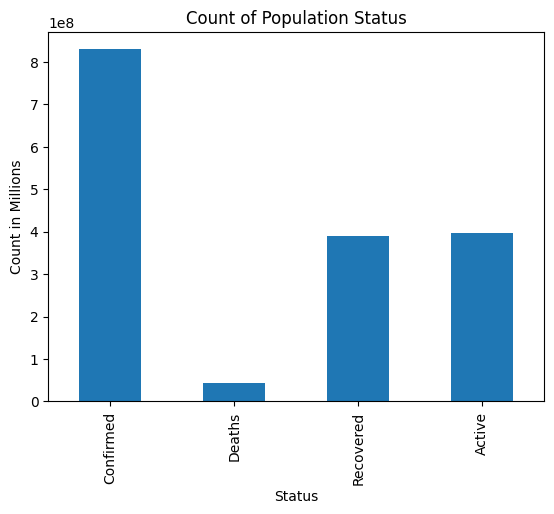

In [ ]:
status = ['Confirmed','Deaths','Recovered','Active']
column_sums = df_covid[status].sum().plot(kind = 'bar', xlabel = ('Status'),ylabel = ('Count in Millions'), title = ('Count of Population Status'))
plt.show()

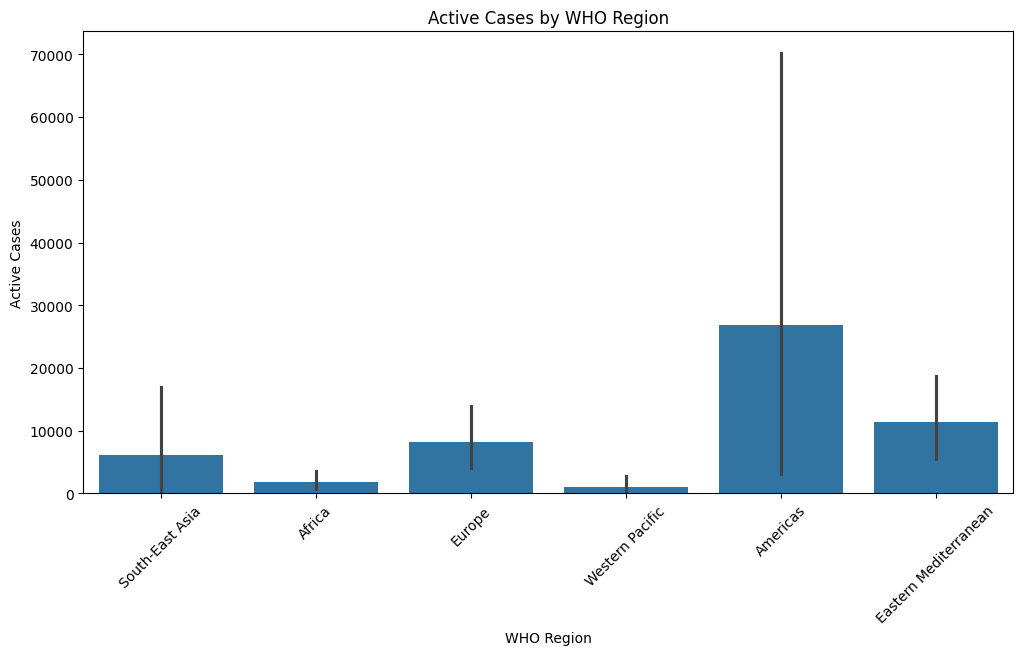

In [ ]:
# Active Cases by WHO Region
plt.figure(figsize=(12, 6))
sns.barplot(x='WHO Region', y='Active', data=combined_data)
plt.title('Active Cases by WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('Active Cases')
plt.xticks(rotation=45)
plt.show()

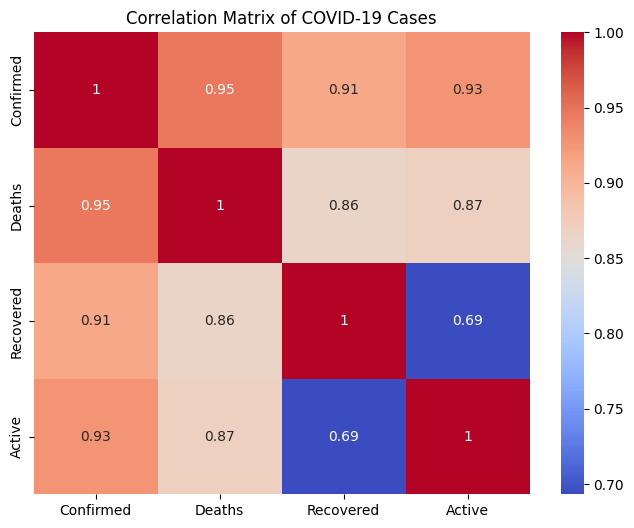

In [ ]:
correlation_matrix = combined_data[['Confirmed', 'Deaths', 'Recovered', 'Active']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of COVID-19 Cases')
plt.show()

In [ ]:
global_data = combined_data.groupby('Country/Region')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

fig = px.scatter_geo(global_data, locations="Country/Region", locationmode='country names',
                     size="Confirmed", color="Deaths", hover_name="Country/Region",
                     title='Global Distribution of COVID-19 Cases',
                     projection="natural earth")
fig.show()